# Group Assignment

### Name: Yiga Fahim
### Reg No: 2022/HD07/2054U
### Name: Kisakye Barbra
### Reg No: 2022/HD07/1966U

# Group Project Assignment:-

You are a lead data scientist on a project regarding healthy, you are provided with a dataset regarding featal health. (Please find the dataset in the data folder given). These are your instructions
1 - Use that dataset to do: EDA, Clean the data
2 - Use mandas Profiling to export a pdf report of your data (explain how the report informs your future decisions)
3 - Apply any needed transformations if possible.
4 - Choose a proper evaluation metric for your project.
5 - Do model spot checking to find the best model for your use.
6 - Build the chosen model
7 - Evaluate bias vs variance on your model and present your results.

Note:
- Please follow instructions!
- You have to explain in detail every step you are executing in your own words, your result will be based on how well you explain what steps you are executing.
- Students are allowed to use public resources off the internet for their research, however students are not allowed to copy and paste code for this assignment (If you are caught, you will fail this assignment, you have been warned: especially chatGpt.)
- This is a graded group assignment any malpractice will lead to losing of points, this assignment contributes a great percentage to your final grade.
- All assignments must be handed in by Close of Business next Wednesday by 6:00PM Date: 29 - May - 2023
- All your assignments will be handed in by means of a pull request to my original repository.
- Please name your pull requests as per previously instructed, you will not get warnings for failing to do this.
- Your work should be saved in the Project Folder (Create your own folder and give the folder your name.)


In [ ]:
# Importing required libraries

%matplotlib inline 
import pandas as pd # For the manipulation of tabular data
import numpy as np # For improved numerical calculation
from ydata_profiling import ProfileReport # For exploratory data analysis reporting
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For improved plot outlook
from sklearn.preprocessing import LabelEncoder
# Importing the scaler
from sklearn.preprocessing import StandardScaler

# Importing required models and metrics for the Assignment
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# removing the warnings from the cells.
import warnings
warnings.filterwarnings('ignore')

### Task 1

#### Reading the Data

In [ ]:
# Loading the health status data
dfet = pd.read_csv("BigData_Assignment_final_dataset.csv")

print(dfet.shape)


(10000, 61)


In [ ]:
dfet.head(4)

,PatientID,Age,Gender,Sexual_Orientation,Race,Weight,Height,BMI,Label,Fever,...,SinusPain,SwollenLymphNodes,MemoryLoss,Dehydration,IncreasedUrination,DryMouth,TinglingInHandsOrFeet,RedEye,LossOfConsciousness,Disease
0,33216,72,Female,Others,Others,112,156,46.0,1,0,...,1,1,0,0,1,1,1,0,1,Healthy
1,89319,45,Female,Others,Caucasian,40,190,11.1,1,1,...,1,0,0,1,0,1,1,1,1,Covid-19
2,48170,44,Male,Homosexual,African,112,209,25.6,0,0,...,1,1,0,0,1,1,1,0,0,Malaria
3,83430,40,Male,Heterosexual,Hispanic,83,195,21.8,1,0,...,0,1,1,1,0,1,0,1,0,Diabetes


#### Exploratory Data Analysis (EDA)

Searching for possible errors or duplications during data entry.

Checking the quantity of columns, rows, null values, and descriptive statistics (data distributions) is necessary.

- **Data description**

- **Univariate analysis** - Here, we explore each individual feature/ column to gain more insight into its distribution
- **Bivariate analysis** - Here, we explore the relatedness between each two individual features, more like checking their correlation. we mainly considered the relatedness of each feature to the target ( fetal health ).
- **Multivariate analysis** - Here, we explore the relatedness of three or more features of which one is the target (fetal health). This is based on insights obtained from Bivariate analysis.

#### Univariate Analysis

In [ ]:
# Displaying the last eight rows of the dataset
dfet.tail(8)

,PatientID,Age,Gender,Sexual_Orientation,Race,Weight,Height,BMI,Label,Fever,...,SinusPain,SwollenLymphNodes,MemoryLoss,Dehydration,IncreasedUrination,DryMouth,TinglingInHandsOrFeet,RedEye,LossOfConsciousness,Disease
9992,92125,30,Male,Heterosexual,Asian,102,174,33.7,1,1,...,0,1,0,0,0,0,0,1,0,HIV
9993,53260,95,Male,Asexual,Asian,95,210,21.5,0,0,...,0,1,1,0,1,0,1,0,1,Covid-19
9994,10451,34,Female,Bisexual,Hispanic,52,153,22.2,0,0,...,1,0,1,0,0,0,1,0,1,Covid-19
9995,19615,30,Female,Bisexual,African,46,145,21.9,0,0,...,0,0,1,0,1,1,1,1,1,HIV
9996,84552,74,Male,Bisexual,Hispanic,114,188,32.3,0,1,...,1,0,0,0,1,0,0,0,1,HIV
9997,85999,22,Female,Asexual,Caucasian,42,208,9.7,0,1,...,0,1,0,1,1,0,1,0,0,Diabetes
9998,50009,22,Male,Bisexual,Caucasian,84,170,29.1,0,0,...,0,0,0,1,1,1,1,1,0,Malaria
9999,92568,90,Female,Homosexual,Asian,90,204,21.6,1,1,...,0,0,1,0,0,0,0,1,1,Covid-19


In [ ]:
# Checking for number presence of null values and dtypes
dfet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientID              10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Sexual_Orientation     10000 non-null  object 
 4   Race                   10000 non-null  object 
 5   Weight                 10000 non-null  int64  
 6   Height                 10000 non-null  int64  
 7   BMI                    10000 non-null  float64
 8   Label                  10000 non-null  int64  
 9   Fever                  10000 non-null  int64  
 10  Cough                  10000 non-null  int64  
 11  Fatigue                10000 non-null  int64  
 12  BodyAche               10000 non-null  int64  
 13  LossOfTaste            10000 non-null  int64  
 14  Sweating               10000 non-null  int64  
 15  Hea

In [ ]:
# Displaying the data's descriptive statistics
dfet.describe().round(2)

,PatientID,Age,Weight,Height,BMI,Label,Fever,Cough,Fatigue,BodyAche,...,RunnyNose,SinusPain,SwollenLymphNodes,MemoryLoss,Dehydration,IncreasedUrination,DryMouth,TinglingInHandsOrFeet,RedEye,LossOfConsciousness
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.0,10000.00,10000.00,...,10000.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00
mean,49903.77,57.87,79.70,174.87,27.16,0.5,0.5,0.5,0.49,0.49,...,0.5,0.5,0.5,0.5,0.49,0.5,0.5,0.5,0.5,0.49
std,28948.68,24.67,23.35,20.34,10.37,0.5,0.5,0.5,0.50,0.50,...,0.5,0.5,0.5,0.5,0.50,0.5,0.5,0.5,0.5,0.50
min,5.00,15.00,40.00,140.00,9.10,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
25%,24647.50,37.00,59.00,157.00,19.20,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
50%,49478.50,58.00,80.00,175.00,25.70,0.0,1.0,0.0,0.00,0.00,...,1.0,1.0,0.0,1.0,0.00,1.0,0.0,1.0,0.0,0.00
75%,75294.00,79.00,100.00,192.00,33.60,1.0,1.0,1.0,1.00,1.00,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00
max,99991.00,100.00,120.00,210.00,61.20,1.0,1.0,1.0,1.00,1.00,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00


## Explanation.

* The descriptive output above shows that each of the 22 columns (variables/features) has 1000 entries. 
* Participants ranged in age from 15 to 100, with a mean age of 58.
* The 16 variables are coded categorical ones, while the output variable (Disease) is qualitative. The variables Age, Weight, Height, and BMI are all quantitative.

In [ ]:
# Checking for duplicates
dfet[dfet.duplicated()]

,PatientID,Age,Gender,Sexual_Orientation,Race,Weight,Height,BMI,Label,Fever,...,SinusPain,SwollenLymphNodes,MemoryLoss,Dehydration,IncreasedUrination,DryMouth,TinglingInHandsOrFeet,RedEye,LossOfConsciousness,Disease


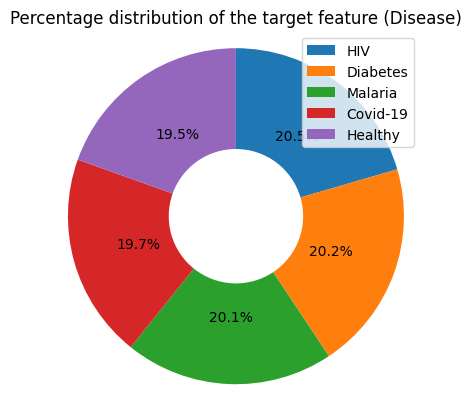

In [ ]:
# Proportion of fetal health classes
plt.pie(dfet['Disease'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%', wedgeprops = {'width' : 0.6});
plt.axis('square')
#plt.legend()
plt.legend(['HIV','Diabetes','Malaria','Covid-19','Healthy'])
plt.title("Percentage distribution of the target feature (Disease)");

#### Multivariate Analysis

* This will enable us to comprehend how the various factors relate to the desired result for this dataset. The initial patientID variable is removed using the following code because it is deemed unnecessary for this study.

In [ ]:
dfetimp = dfet.iloc[:, 1:]
dfetimp.head()

,Age,Gender,Sexual_Orientation,Race,Weight,Height,BMI,Label,Fever,Cough,...,SinusPain,SwollenLymphNodes,MemoryLoss,Dehydration,IncreasedUrination,DryMouth,TinglingInHandsOrFeet,RedEye,LossOfConsciousness,Disease
0,72,Female,Others,Others,112,156,46.0,1,0,0,...,1,1,0,0,1,1,1,0,1,Healthy
1,45,Female,Others,Caucasian,40,190,11.1,1,1,0,...,1,0,0,1,0,1,1,1,1,Covid-19
2,44,Male,Homosexual,African,112,209,25.6,0,0,1,...,1,1,0,0,1,1,1,0,0,Malaria
3,40,Male,Heterosexual,Hispanic,83,195,21.8,1,0,0,...,0,1,1,1,0,1,0,1,0,Diabetes
4,81,Male,Asexual,African,83,144,40.0,0,1,0,...,0,1,1,0,0,0,0,0,1,Covid-19


In [ ]:
import pandas as pd
# Correlation between the features
#plt.figure(figsize = [15, 15])
# Set the display options
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
#sns.heatmap(dfetimp.corr(method = 'pearson'), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
#plt.title("Correlation between each pair of features in the health data", fontsize = 20);
correlation_matrix = dfetimp.corr()
correlation_matrix_styled = correlation_matrix.style.set_table_styles([{'selector': 'th',
                                                                       'props': [('font-size', '14pt')]},
                                                                      {'selector': 'td',
                                                                       'props': [('font-size', '12pt')]}])
print(correlation_matrix)

                        Age  Weight  Height   BMI  Label  Fever  Cough  \
Age                    1.00    0.00    0.01 -0.00  -0.01  -0.01  -0.00   
Weight                 0.00    1.00    0.00  0.76  -0.01  -0.00  -0.00   
Height                 0.01    0.00    1.00 -0.61   0.00   0.01   0.00   
BMI                   -0.00    0.76   -0.61  1.00  -0.01  -0.00  -0.00   
Label                 -0.01   -0.01    0.00 -0.01   1.00  -0.01  -0.01   
Fever                 -0.01   -0.00    0.01 -0.00  -0.01   1.00   0.00   
Cough                 -0.00   -0.00    0.00 -0.00  -0.01   0.00   1.00   
Fatigue                0.00    0.02    0.01  0.01   0.00  -0.00   0.00   
BodyAche              -0.01   -0.00    0.01 -0.01   0.02   0.00   0.03   
LossOfTaste            0.01   -0.01   -0.01 -0.00   0.01   0.01  -0.01   
Sweating               0.01   -0.01    0.00 -0.01   0.00  -0.01   0.00   
Headache               0.00   -0.03   -0.01 -0.02   0.00  -0.00   0.02   
Nausea                 0.01   -0.01   

The traits having a stronger absolute correlation to fetal health were plotted against the target based on the aforementioned correlation.

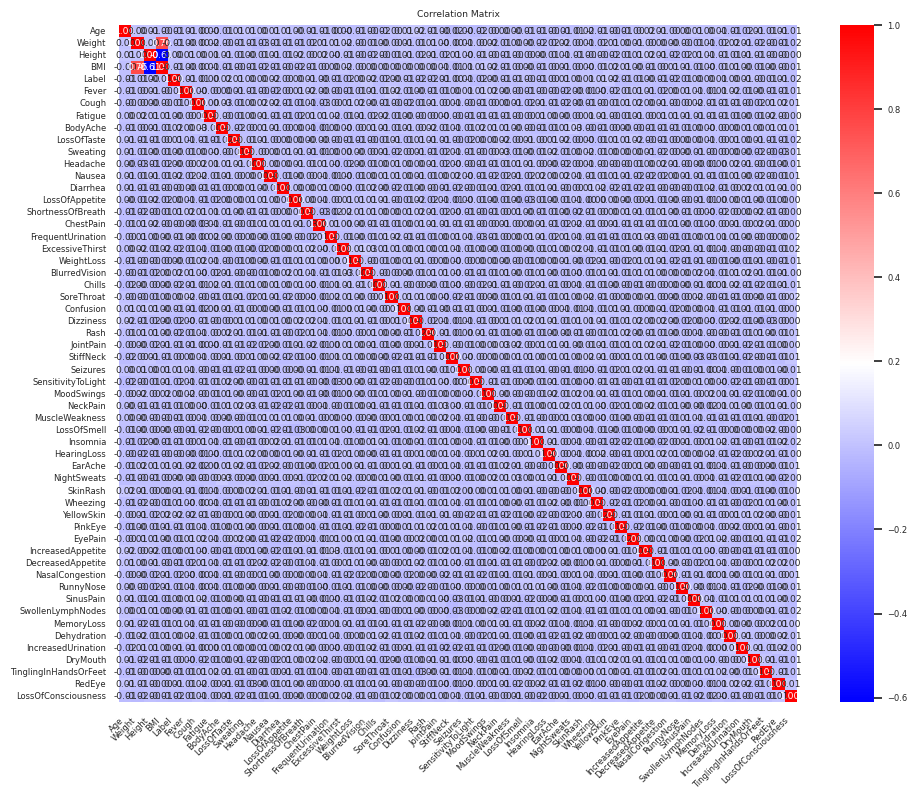

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the correlation matrix and stored it as 'correlation_matrix'

# Create a heatmap of the correlation matrix using seaborn
sns.set(font_scale=0.55)  # Adjust the font scale as needed
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Customize the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="bwr", cbar=True, square=True)
plt.title("Correlation Matrix")

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent cutoff of labels
plt.tight_layout()
plt.savefig('moz_out.pdf')
plt.show()


### Explanation

* We chose to dive deeper to understand the availability of outliers in the distinct cateries and, consequently, a general picture. The correlation matrix gave a hit but did not provide meaningful insight about the dataset.


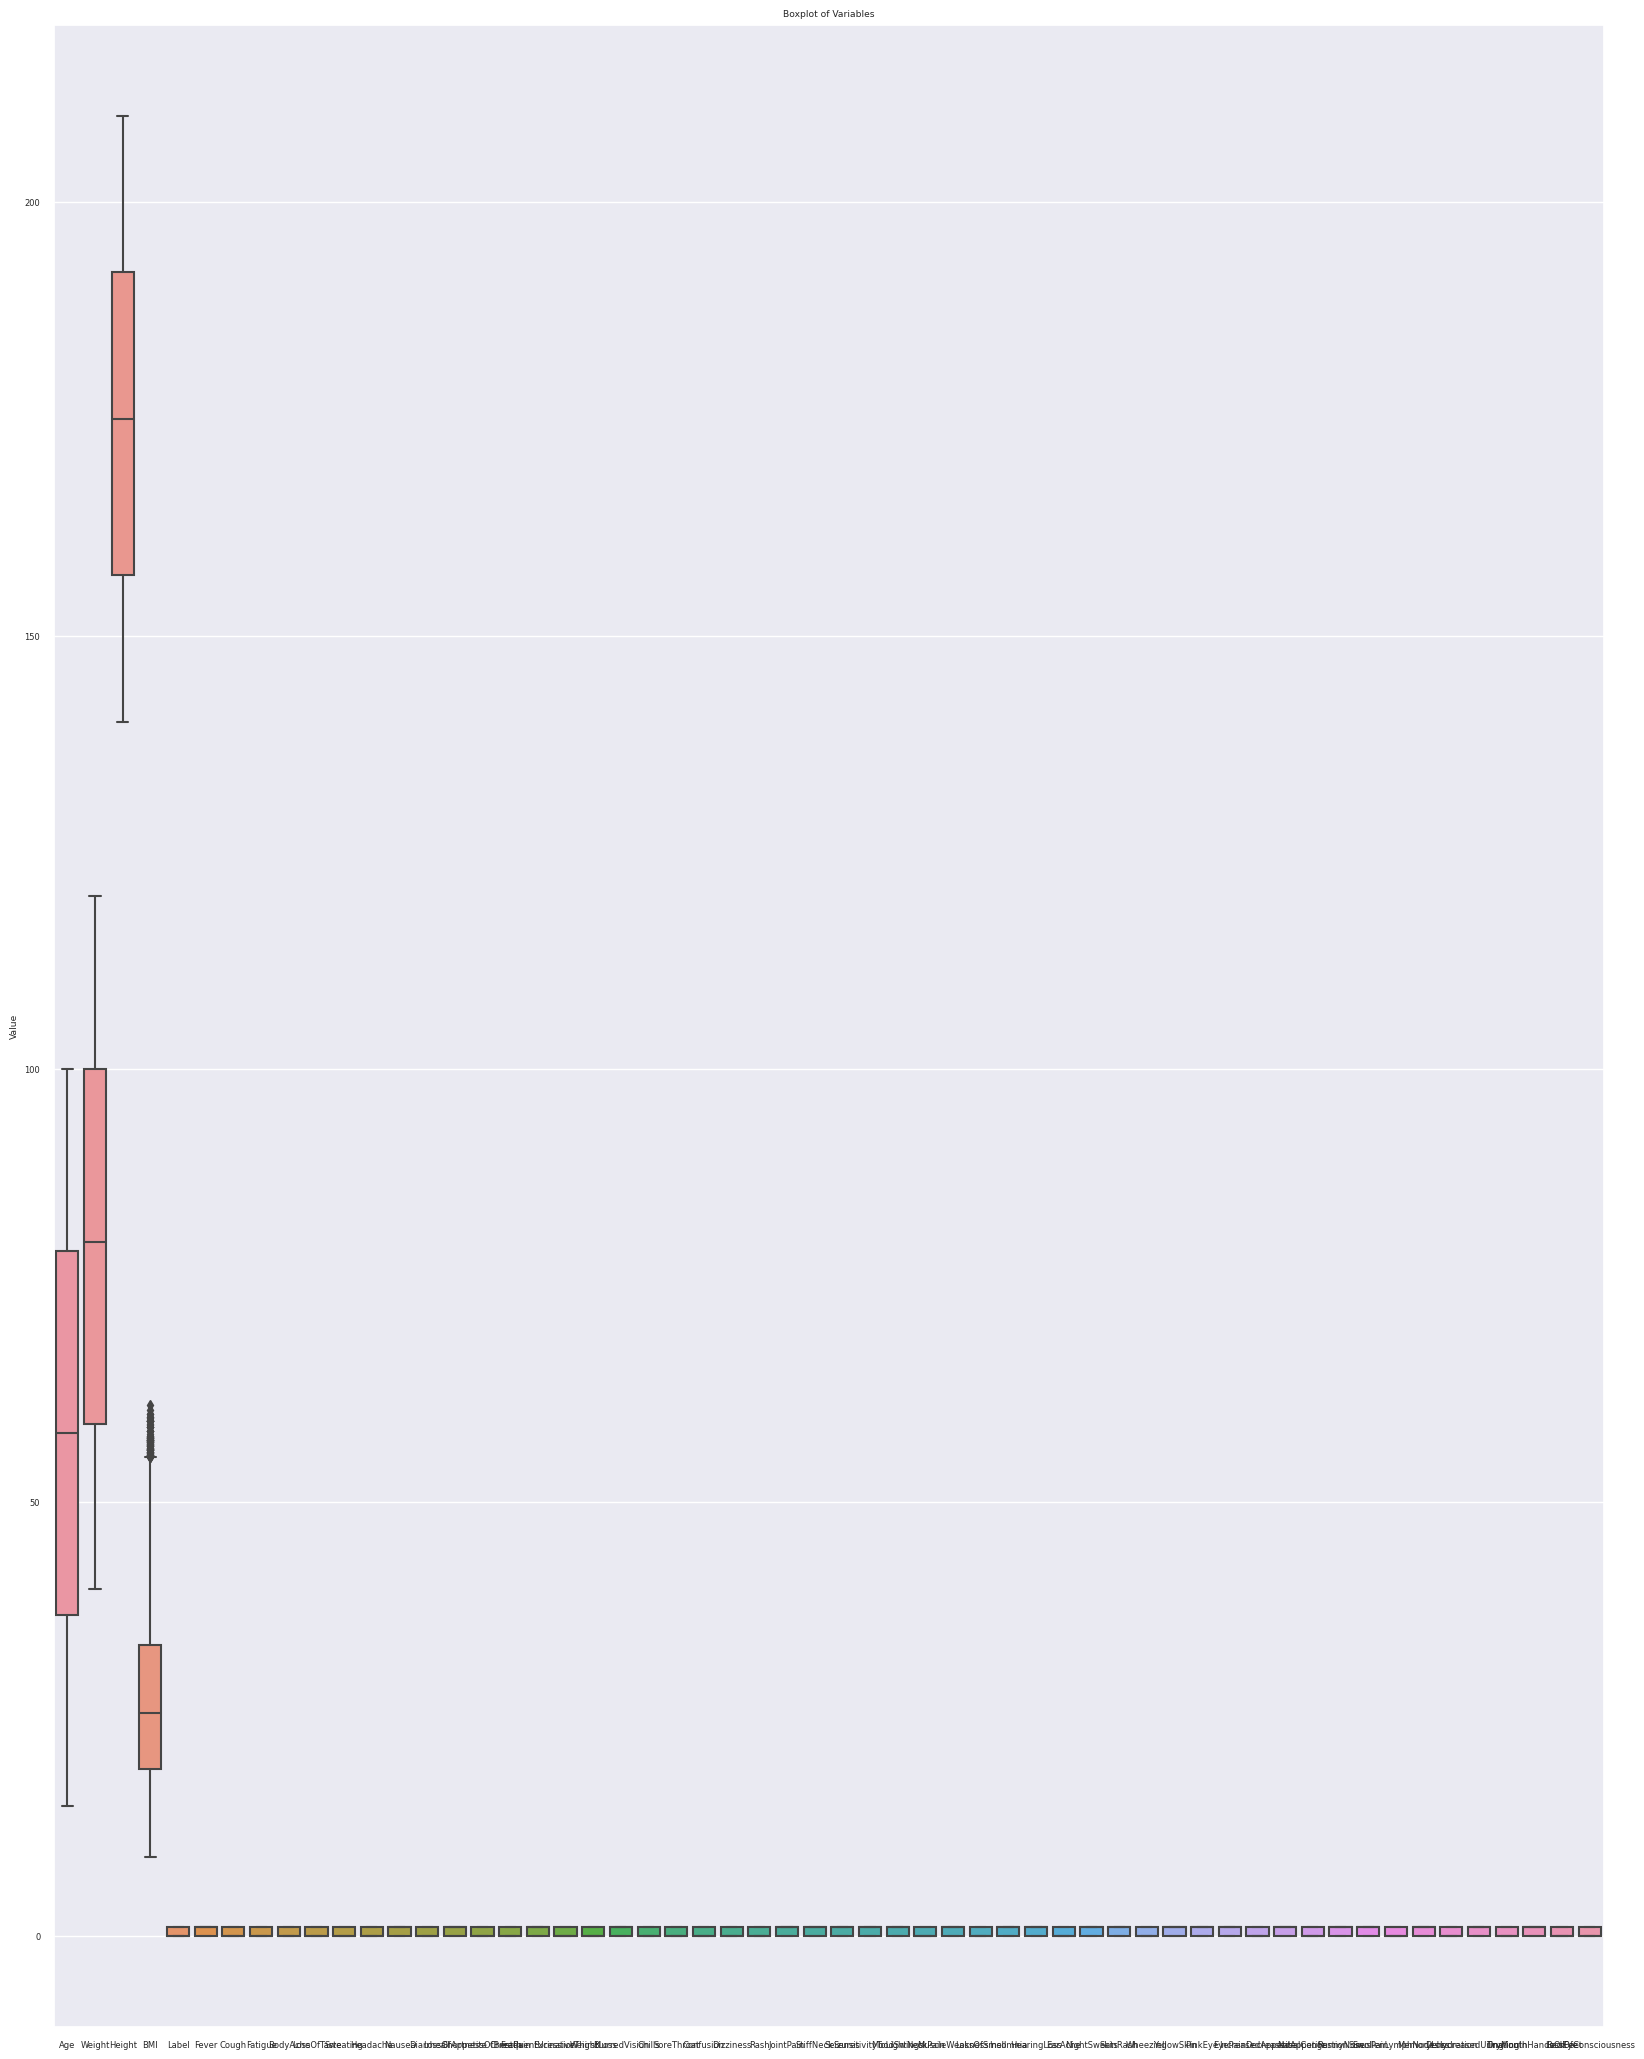

In [ ]:
# plotting the distributions of the features on the same graph

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create boxplots for each column using seaborn
plt.figure(figsize=(20, 26))  # Adjust the figure size as needed

# Plot boxplots using seaborn
sns.boxplot(data=dfetimp)

plt.title("Boxplot of Variables")
plt.ylabel("Value")

plt.show()


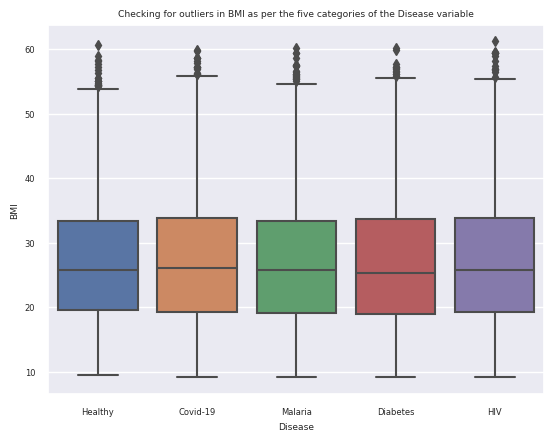

In [ ]:
sns.boxplot(data = dfetimp, x = 'Disease', y = 'BMI')
plt.title("Checking for outliers in BMI as per the five categories of the Disease variable");

* Although there are some outliers in the disease categories, the dataset as a whole contains no notable outliers. However, several quantitative variables, such body mass index (BDM), did. We will get rid of the few existing outliers in several categories to make our model more useful to the decision-makers.

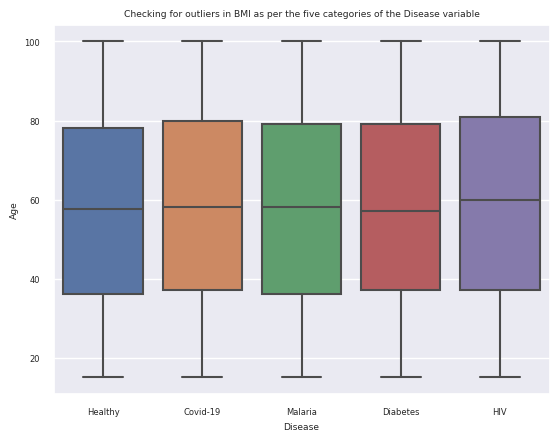

In [ ]:
sns.boxplot(data = dfetimp, x = 'Disease', y = 'Age')
plt.title("Checking for outliers in BMI as per the five categories of the Disease variable");

#### Multivariate Analysis

#### Data Cleaning

In [ ]:
# Displaying the unique values in the disease feature
dfetimp.Disease.unique()

array(['Healthy', 'Covid-19', 'Malaria', 'Diabetes', 'HIV'], dtype=object)

#### Task 1 Results

**Data Description**
There are 61 features per row in the 10,000 data points.
- No null values exist.
- Despite the fact that there are more features with **zeroes** (0.0), this is a typical record value for the features in question, hence no additional data imputation is required.

**Univariate Analysis**
- The ranges of values for the individual attributes seem to be varied.
- When we visualized the objective feature (Disease), we found that the dataset is almost evenly distributed, with 20.5% of the population being "HIV," 20.2% being "Disease," 20.1% being malaria, 19.7% being Covid-19, and 19.5% being "Healthy" individuals.

**Bivariate Analysis**
- In comparison to the other traits, the following ones were discovered to be considerably more connected to the target:
    BMI, age, and weight are all factors.
    The existence of outliers was then examined by comparing the features to the target using violin and box plots.
    - It was discovered that a number of variables, including Age, were regularly distributed.

**Multivariate Analysis**
- The target feature acted as the third entity, and the found correlated features were then shown in pairs in relation to it.

**Data Cleaning** </br>
The dataset appeared to be clean, therefore there was no need to eliminate any entries besides the several outliers that were eliminated to increase the effectiveness of the established model. The patientID variable was eliminated from the analysis because it was determined that it was not necessary for the model's support.

### Task 2

#### Pandas Profiling </br>
The 'ydata_profiling' package was used as a replacement for the deprecated pandas profiling package.

The 'ProfileReport' method of the ydata_profiling package was used to create the report.

The software does not support saving an html version of the report as a pdf for export.

Additionally, the report was visible in the notebook.

In [ ]:
# Creating the pandas_profiling report for the Health Data named profile
profile = ProfileReport(dfetimp, title="Participants' Health Data Pandas Profiling Report", explorative = True)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
# As the pdf export is not supported, the pandas_profiling report will be saved as an html
profile.to_file("Participants_Health_Data_report_Group_project_Fahim_and_barbra.html")

#### Task 2 Result </br>

Issues - Since the data are balanced, the imbalance issue does not need to be addressed.
- Standardizing quantitative variables is necessary since some algorithms favor working with tiny values.

16 category variables are present.
- As previously said, the data is balanced based on the objective feature (Disease).

Information
- Standardization of the various feature scales is necessary for improved machine learning algorithm training.
- The duplicate rows could need to be removed, but upon observation, I decided against doing so for the reasons stated in "Task 1".
- Categorical variables were created out of the categorical features.
- When the data is split during training, the splits must be "stratified" to ensure that each "target feature value" is fairly represented.
- To balance the data or "sample the data" such that all desired feature values are fairly represented, "synthetic data" may need to be created.

### Task 3

#### Applying Transformations

The features of the dataset were modified using the "StandardScaler" package of sci-kit learn because some algorithms, such as "Support Vector Machines (SVMs)" and "neural networks," are particularly sensitive to the scaling of the data.

The StandardScaler in scikit-learn guarantees that the mean and variance for each feature are both 0 and 1, but it does not guarantee any particular minimum and maximum values for the features.

One may think about utilizing sci-kit learn's "RobustScaler" as an alternative as this scaler may be impacted by outliers.

#### Scaling the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical variable
dfetimp['Gender'] = label_encoder.fit_transform(dfetimp['Gender'])
dfetimp['Sexual_Orientation'] = label_encoder.fit_transform(dfetimp['Sexual_Orientation'])
dfetimp['Race'] = label_encoder.fit_transform(dfetimp['Race'])
dfetimp['Disease'] = label_encoder.fit_transform(dfetimp['Disease'])

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the quantitative variable
dfetimp['Weight'] = scaler.fit_transform(dfetimp[['Weight']])
dfetimp['Height'] = scaler.fit_transform(dfetimp[['Height']])
dfetimp['BMI'] = scaler.fit_transform(dfetimp[['BMI']])
dfetimp['Age'] = scaler.fit_transform(dfetimp[['Age']])

dfetimp.head()

,Age,Gender,Sexual_Orientation,Race,Weight,Height,BMI,Label,Fever,Cough,...,SinusPain,SwollenLymphNodes,MemoryLoss,Dehydration,IncreasedUrination,DryMouth,TinglingInHandsOrFeet,RedEye,LossOfConsciousness,Disease
0,0.57,0,4,4,1.38,-0.93,1.82,1,0,0,...,1,1,0,0,1,1,1,0,1,3
1,-0.52,0,4,2,-1.70,0.74,-1.55,1,1,0,...,1,0,0,1,0,1,1,1,1,0
2,-0.56,1,3,0,1.38,1.68,-0.15,0,0,1,...,1,1,0,0,1,1,1,0,0,4
3,-0.72,1,2,3,0.14,0.99,-0.52,1,0,0,...,0,1,1,1,0,1,0,1,0,1
4,0.94,1,0,0,0.14,-1.52,1.24,0,1,0,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
# Initialising the scaler
scaler = StandardScaler()


# Separating the target (Disease) feature from the other features. y - target, X - other features
dfetimpX = dfetimp.drop(['Disease'], axis = 1)
y = dfetimp['Disease']

# Scaling X
X_scaled = scaler.fit_transform(dfetimpX)
dfetimpX.head()

,Age,Gender,Sexual_Orientation,Race,Weight,Height,BMI,Label,Fever,Cough,...,RunnyNose,SinusPain,SwollenLymphNodes,MemoryLoss,Dehydration,IncreasedUrination,DryMouth,TinglingInHandsOrFeet,RedEye,LossOfConsciousness
0,0.57,0,4,4,1.38,-0.93,1.82,1,0,0,...,1,1,1,0,0,1,1,1,0,1
1,-0.52,0,4,2,-1.70,0.74,-1.55,1,1,0,...,1,1,0,0,1,0,1,1,1,1
2,-0.56,1,3,0,1.38,1.68,-0.15,0,0,1,...,0,1,1,0,0,1,1,1,0,0
3,-0.72,1,2,3,0.14,0.99,-0.52,1,0,0,...,0,0,1,1,1,0,1,0,1,0
4,0.94,1,0,0,0.14,-1.52,1.24,0,1,0,...,1,0,1,1,0,0,0,0,0,1


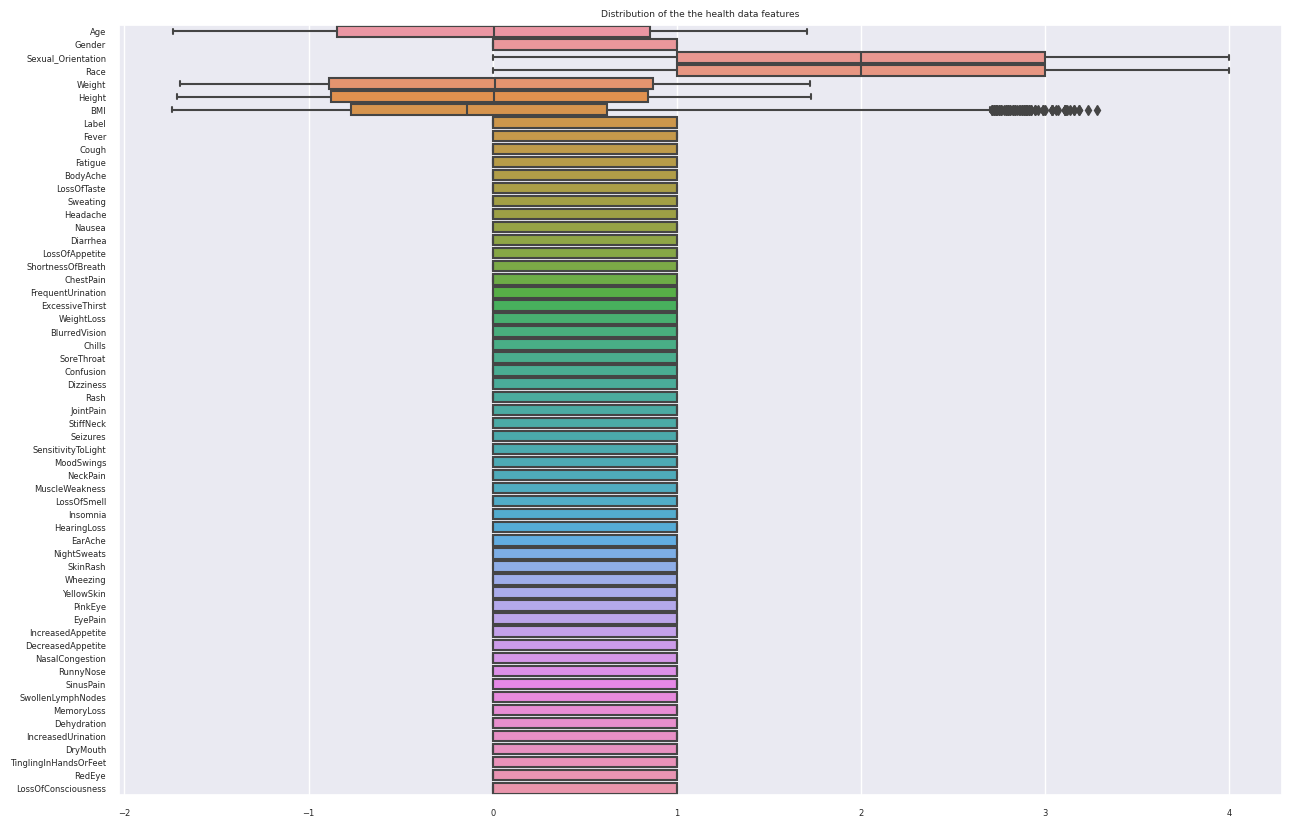

In [ ]:
# Plotting the scaled features
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = dfetimpX, orient = 'h')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = list(dfetimp.columns[:-1])
#ax.set_yticklabels(labels)
plt.title("Distribution of the the health data features");

In [ ]:
import pandas as pd
from scipy.stats import zscore

# find ways of removing outliers from the BMI variable that are clearly indicated in the visual above


#### Task 3 Result

`StandardScaler` was used

### Task 4

#### Proper evaluation metric

The "accuracy" metric is an appropriate one for assessing the machine learning models because the issue at hand is a "classification" problem with "multiple" yet "nearly balanced classes." However, other measures including recall, precision, and f1score will be used. 
We already know that recall is determined by "True Positives / (True Positives + False Negatives)" and that the "f1-score" is determined by "2*(Precision*Recall)/(Precision+Recall)".

Given that the issue concerns medical choices that could mean the difference between life and death, it may be possible to adjust the models' parameters using the "confusion matrix" and "classification report (Precision, Recall, f1-score)".

In this scenario, it may be more detrimental to determine the participant's health status as HIV positive than to determine that he is healthy, hence greater accuracy is required.
The model will still need to be adjusted based on the problem solver's goals and business strategy.

### Task 5

**Model Spot-checking**

classifiers to be used
- Dummy Classifier - Included to check for accuracy given only most frequent class is always predicted as target. Taken as lower baseline classifier.
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbours
- Support Vector Machines - Support Vector Classifier
- Decision Trees
- Ensemble classifiers (Random Forests, Gradient Boosting Classifier and AdaBoostClassifier)

TAccuracy was the evaluation metric he selected. To spot-check a model, various measures like "precision," "recall," and "F1score" would also be used. Since our objective variable, "Disease," in the data is almost evenly distributed, the **"_weighted"** versions of the metrics would not be applied. 


To accommodate "cross validation," the "StratifiedKFold" would be used to make sure that each "split" of the data contains equal amounts of the various "classes." In the event that one chooses the goal value at random or picks the most prevalent class, the "DummyClassifier" will be utilized to set a "baseline score."

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_trainout, X_testout, y_trainout,y_testout = train_test_split(dfetimpX,y,test_size=0.2,random_state=40)

# Now am using the split dataset below

#A quick model selection process
#pipelines of models( it is short was to fit and pred)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipeline_kn = Pipeline([('kn_classifier', KNeighborsClassifier(n_neighbors=5))])

pipeline_lda = Pipeline([('lda', LinearDiscriminantAnalysis())])

#pipeline_nn = Pipeline(['nn_classifier',Neural Networks()])
#nn = MLPClassifier(hidden_layer_sizes=(50,25), activation='relu', solver='adam', random_state=42)
#pipeline_nn = Pipeline([('scaler', StandardScaler()), ('nn_classifier', nn)])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc, pipeline_kn, pipeline_lda]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'LinearDiscriminantAnalysis', 
             1: 'Decision Tree', 
             2: 'RandomForest', 
             3: "SVC", 
             4: "KNeighborsClassifier", 
             5: "Logistic Regression", 
            }


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_trainout, y_trainout)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_trainout,y_trainout, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))



LinearDiscriminantAnalysis: 0.202375 
Decision Tree: 0.191125 
RandomForest: 0.201250 
SVC: 0.195625 
KNeighborsClassifier: 0.199500 
Logistic Regression: 0.202000 
